The following file demonstrates the results visualization code used in our research:

**Imputation of missing values in well log data using k-nearest neighbor collaborative filtering**

The following python libraries are utilized in our research:

*   NumPy
*   Pandas
*   Matplotlib
*   Scikit-Learn


Important to Note:
* Run each cell sequentially unless stated otherwise
* Some cells may take long time to run

In [30]:
# Import all needed python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# To ignore warnings (not needed)
import warnings
warnings.filterwarnings("ignore")

# Collaborative Filtering Prediction Results

The following codes help to viualize the prediction results using collaborative filtering demonstrated in "Imputation_WellLog_CF.ipynb"

* Import files "df_original_test.csv" and ""df_sample_test.csv" that were created from "Imputation_WellLog_CF.ipynb" to continue.

In [31]:
# Import Files
df_sample_test = pd.read_csv('df_sample_test.csv')
df_original_test = pd.read_csv('df_original_test.csv')

In [32]:
## The following cell creates files that combines each "df_sample_test_feature_k.csv" into one file

NN_list = [2, 5, 10, 40, 90, 130, 170] # Number of Neighbors k list used in our research

for cs in NN_list:
    df_sample_test_NN = df_sample_test.copy()
    for feature in ['RHOB', 'NPHI', 'DTC']:
        df_sample_test_feature = pd.read_csv('df_sample_test_%s_%s.csv' % (feature, cs))
        df_sample_test_NN[feature] = df_sample_test_feature[feature]

    df_sample_test_NN.to_csv('df_sample_test_vis_NN_%s.csv' % cs)

#Make DataFrame for Each Feature to Combine All DF

df_RHOB = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_RHOB['RHOB_%s'%cs] = df_sample_vis_NN_temp['RHOB']


df_NPHI = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_NPHI['NPHI_%s'%cs] = df_sample_vis_NN_temp['NPHI']


df_DTC = pd.DataFrame([])
for cs in NN_list:
    df_sample_vis_NN_temp = pd.read_csv('df_sample_test_vis_NN_%s.csv'%cs)
    df_DTC['DTC_%s'%cs] = df_sample_vis_NN_temp['DTC']


#df feature combine dict
df_feature_combine_dict = {
    'df_RHOB': df_RHOB,
    'df_NPHI': df_NPHI,
    'df_DTC': df_DTC
}

## FInd Index that was missing in the first place in df_sample

# All Index By Feature
index_RHOB = df_sample_test.index[df_sample_test['RHOB'] == -9999].tolist()
index_NPHI = df_sample_test.index[df_sample_test['NPHI'] == -9999].tolist()
index_DTC = df_sample_test.index[df_sample_test['DTC'] == -9999].tolist()

# Index Dict
index_feature = {
    'index_RHOB': index_RHOB,
    'index_NPHI': index_NPHI,
    'index_DTC': index_DTC
}

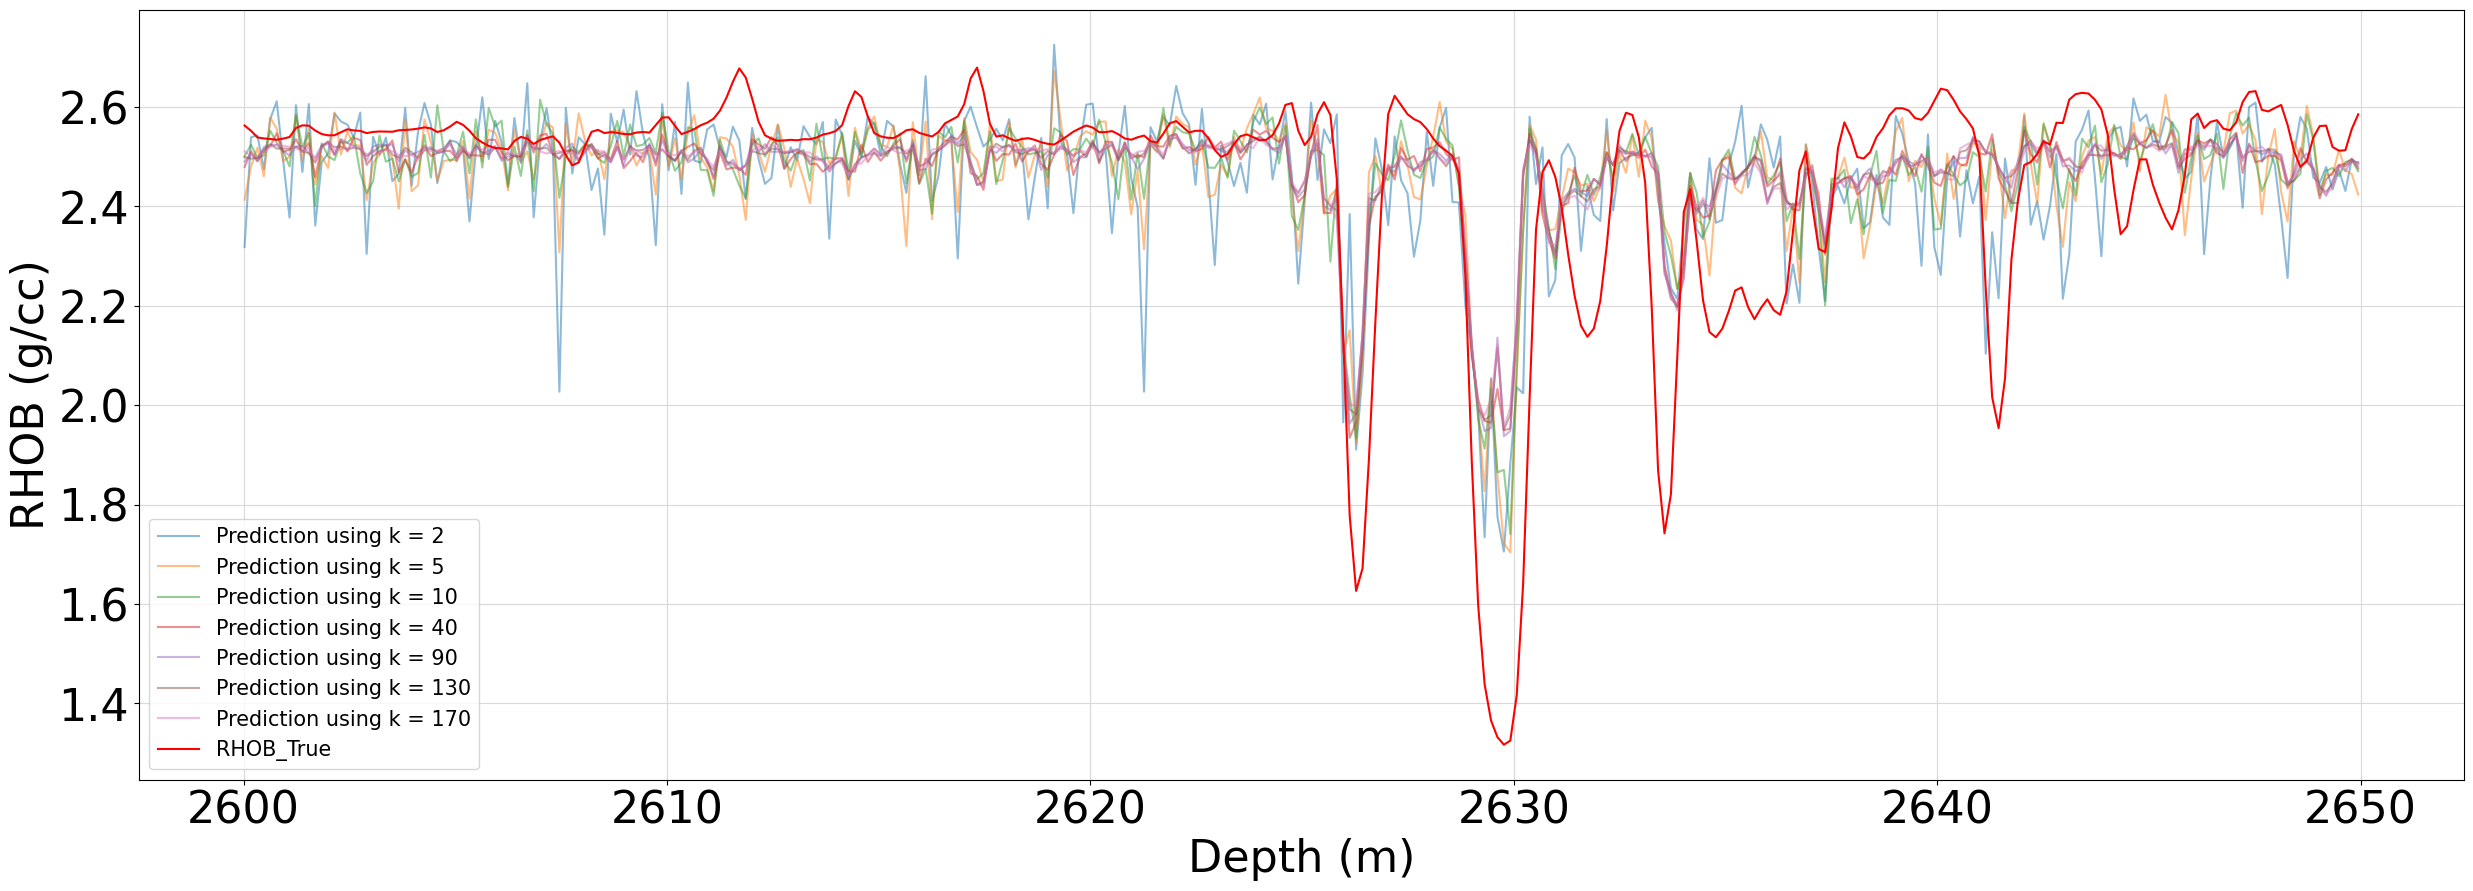

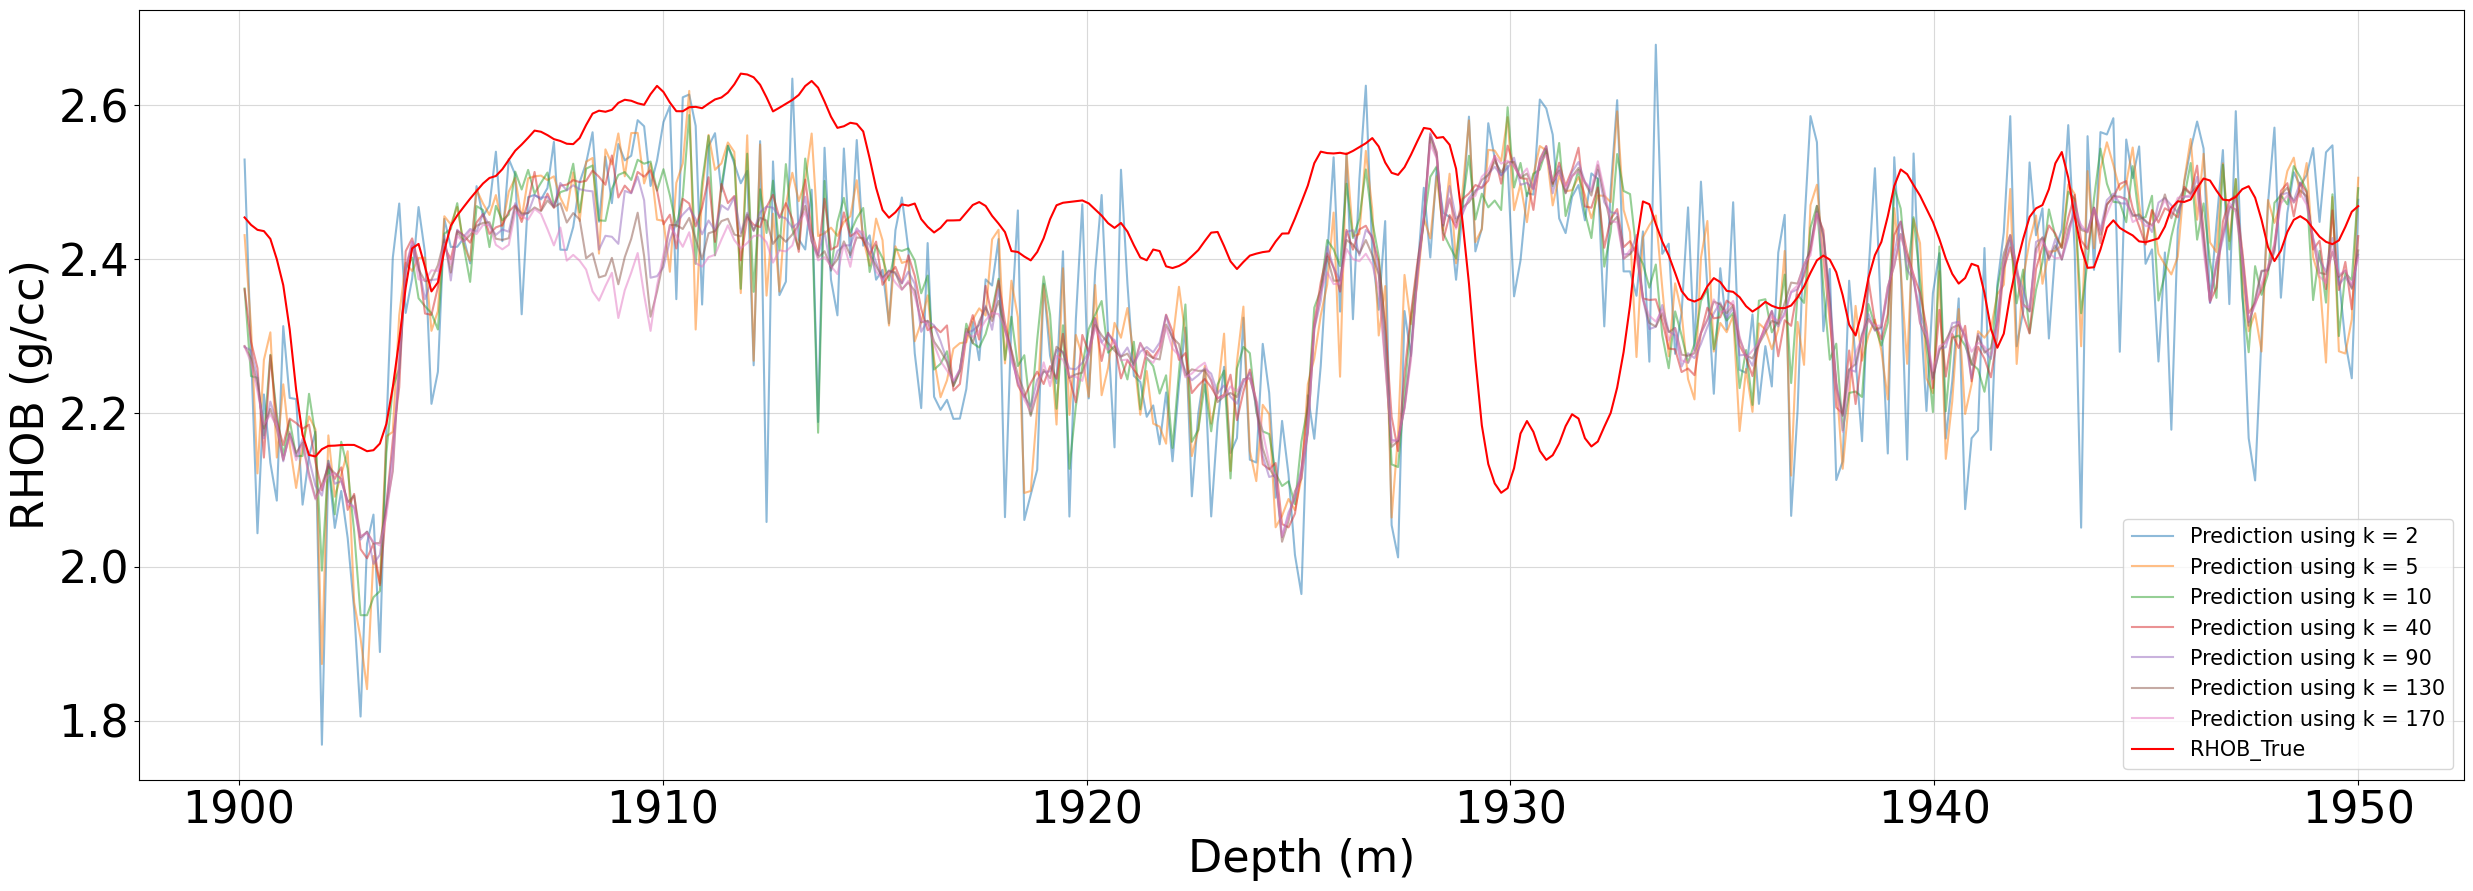

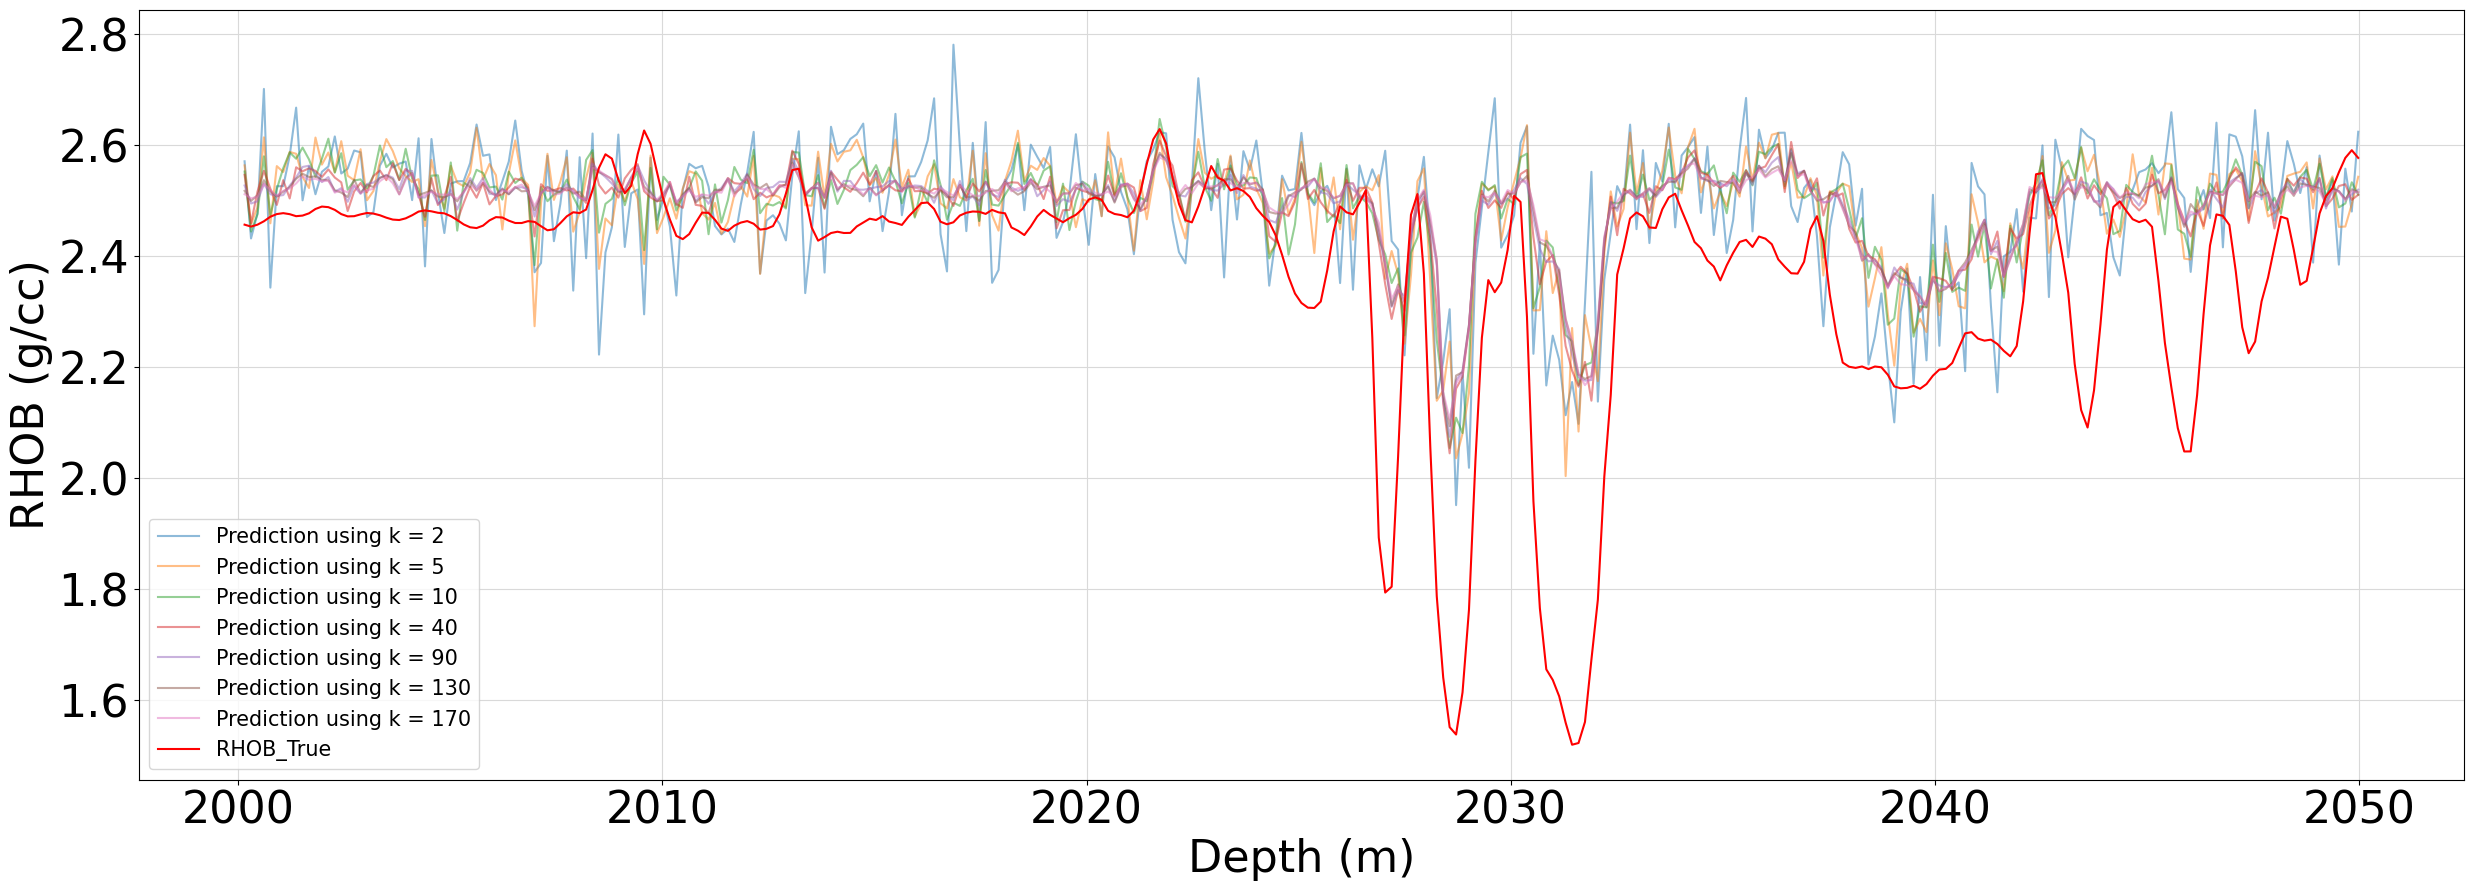

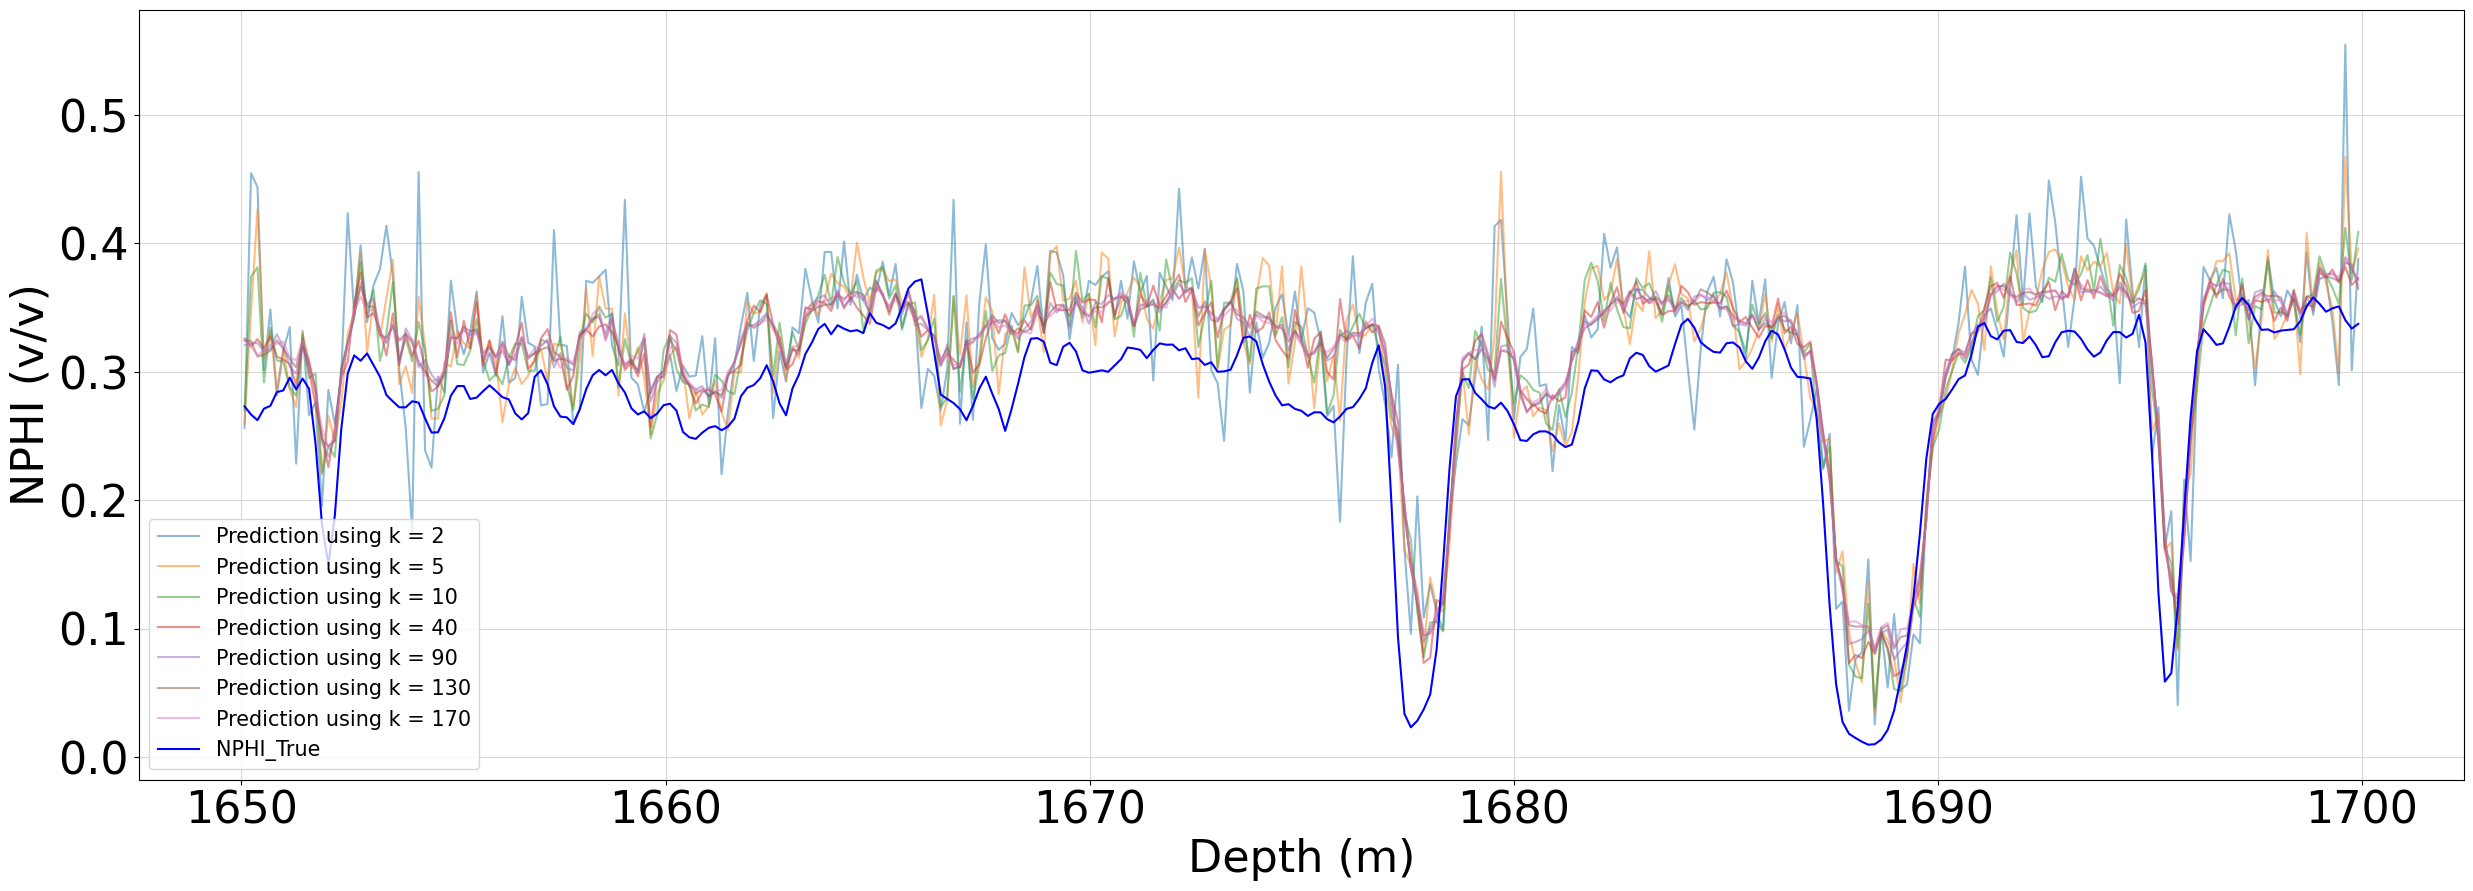

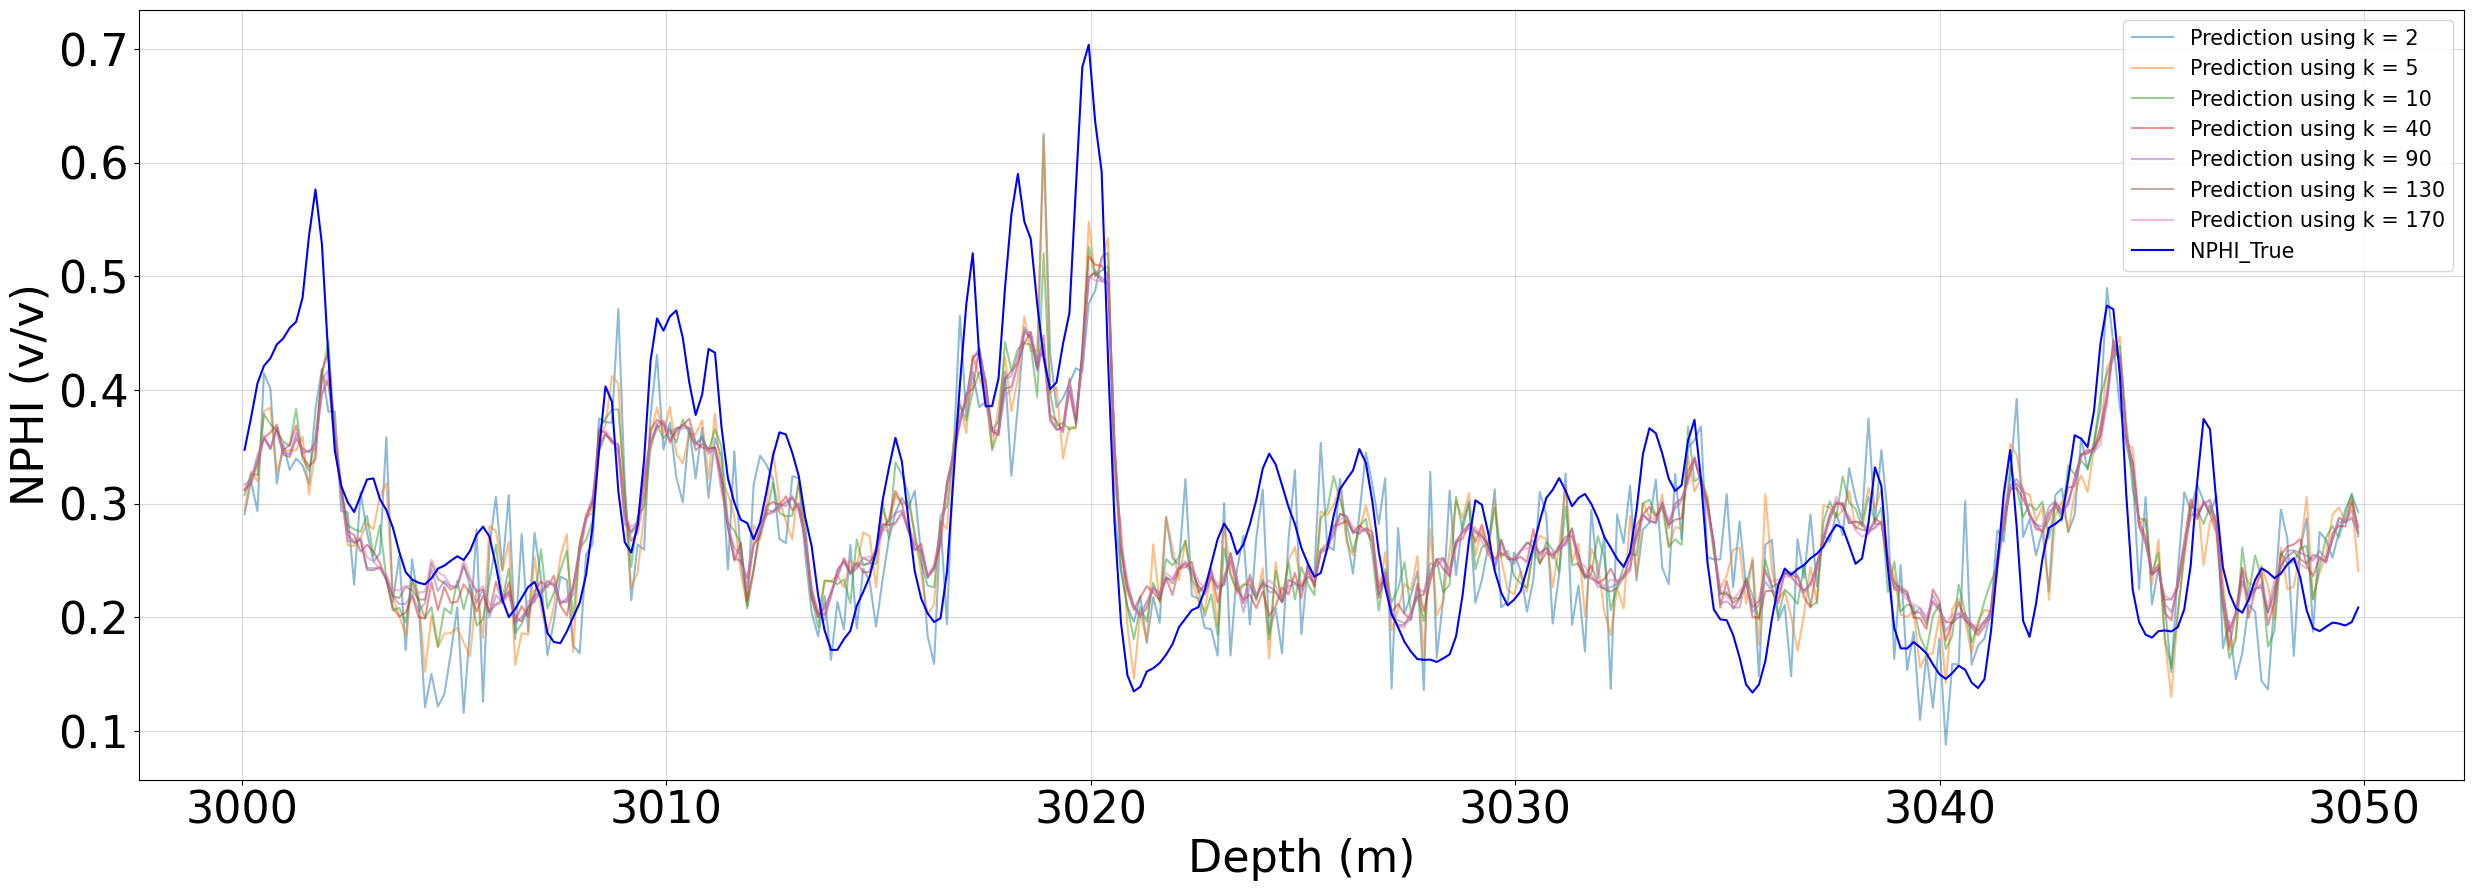

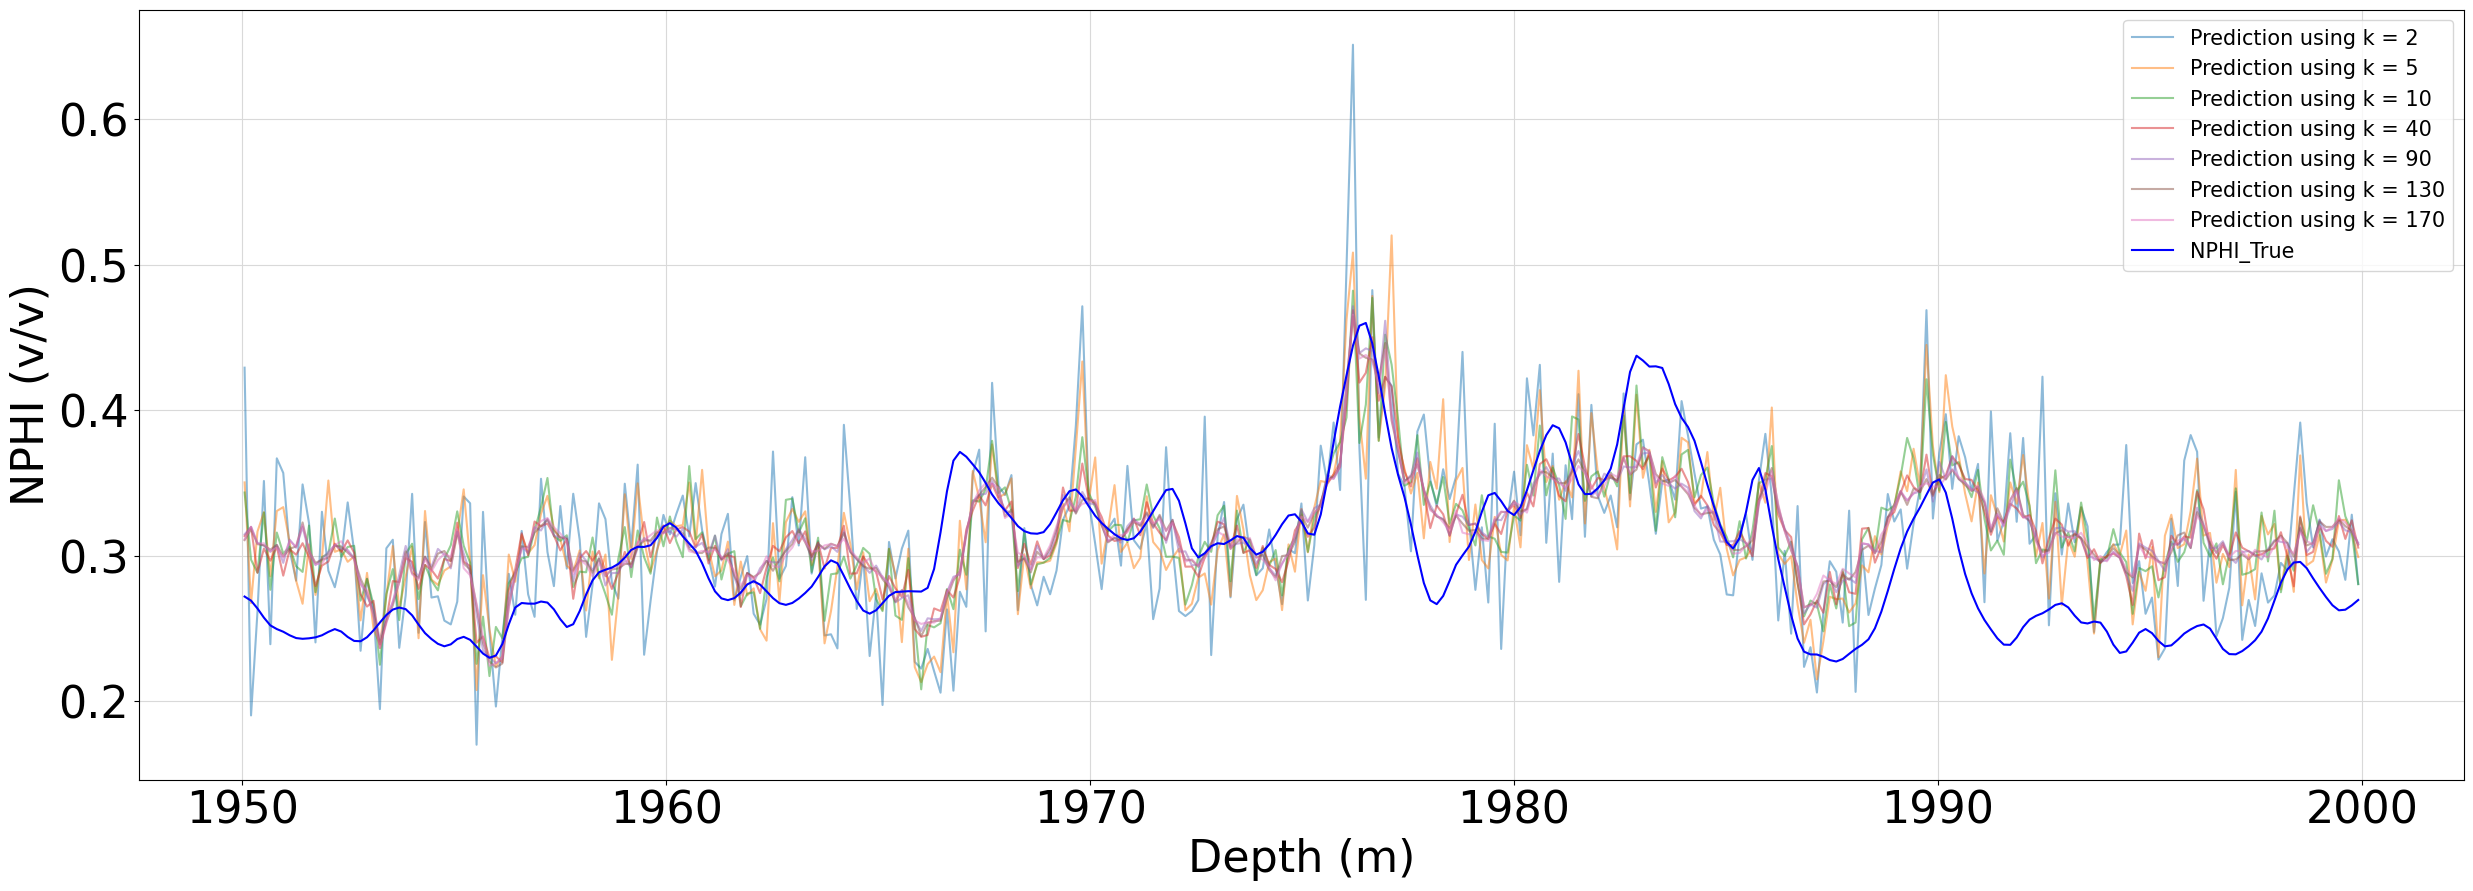

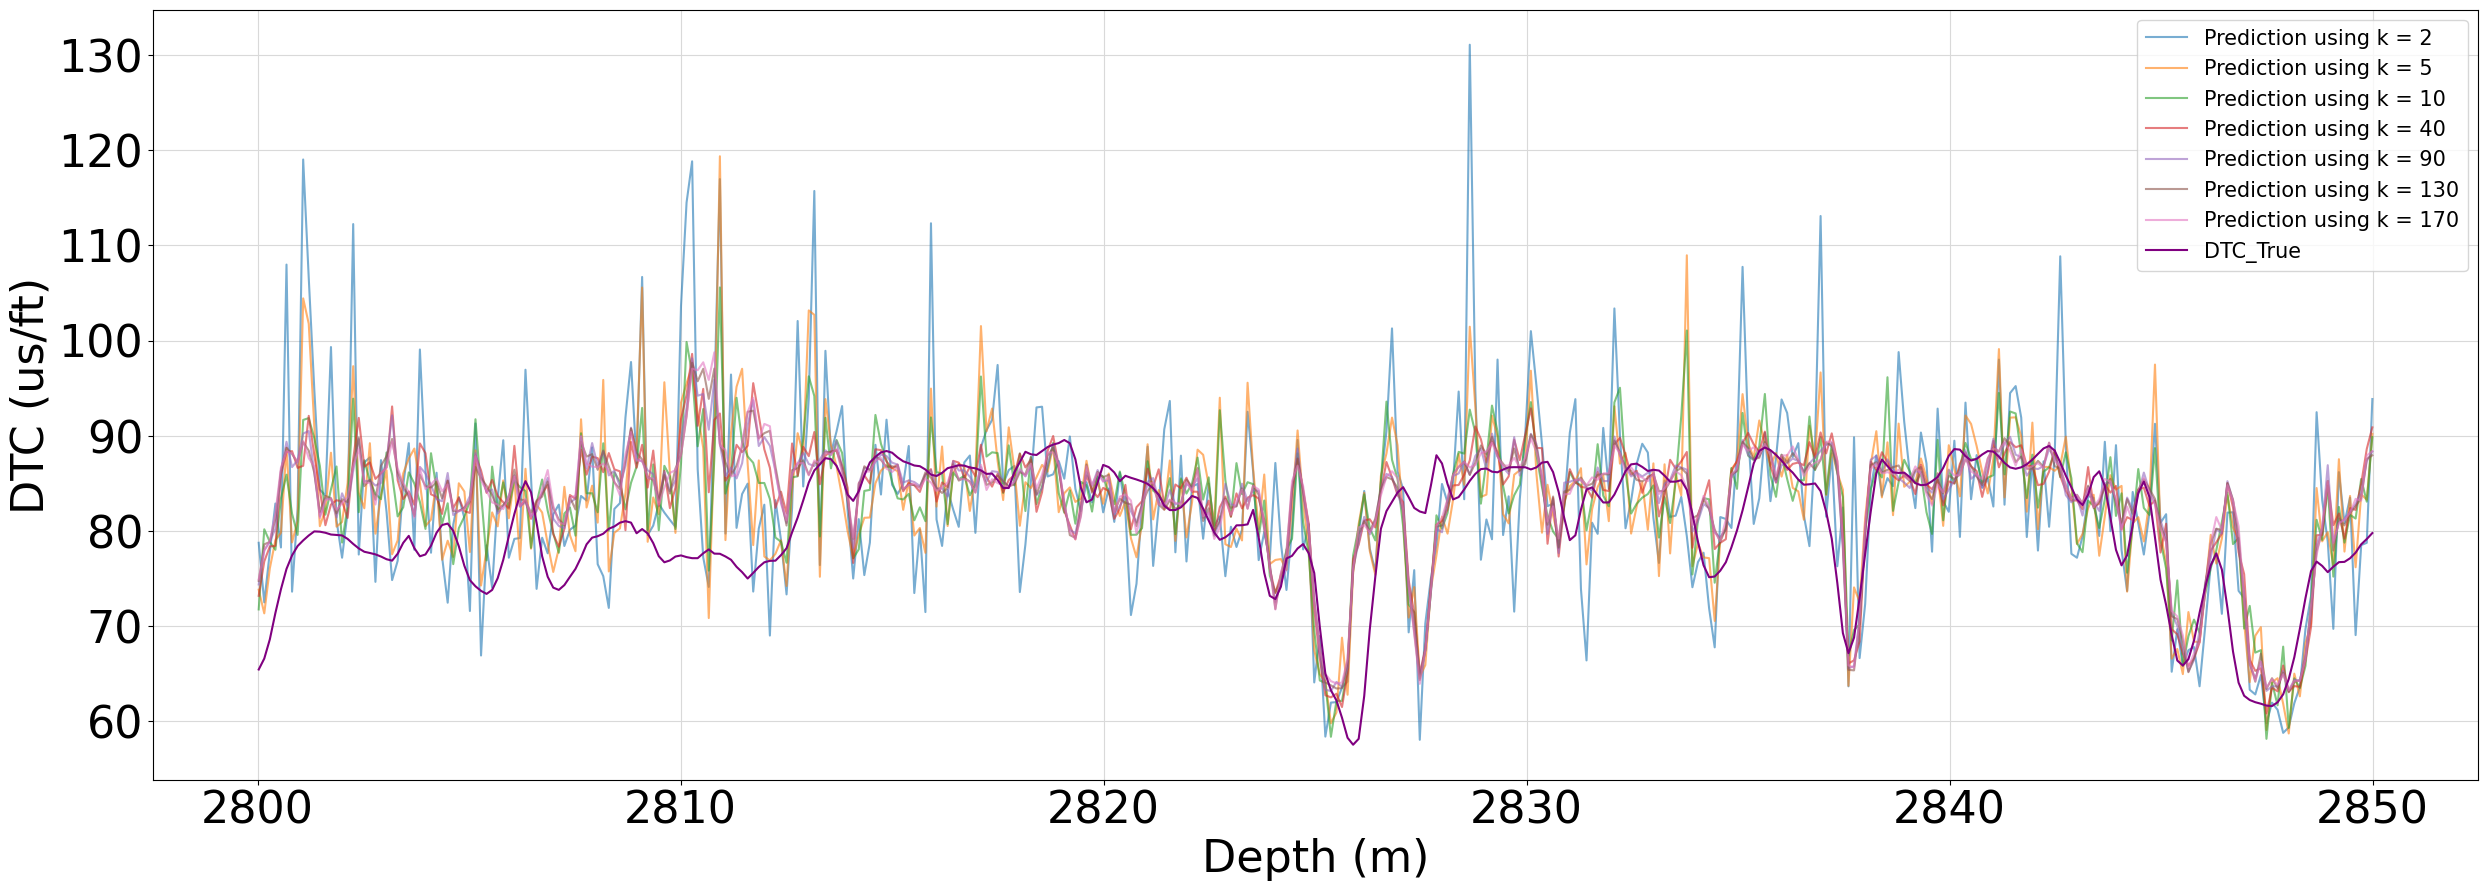

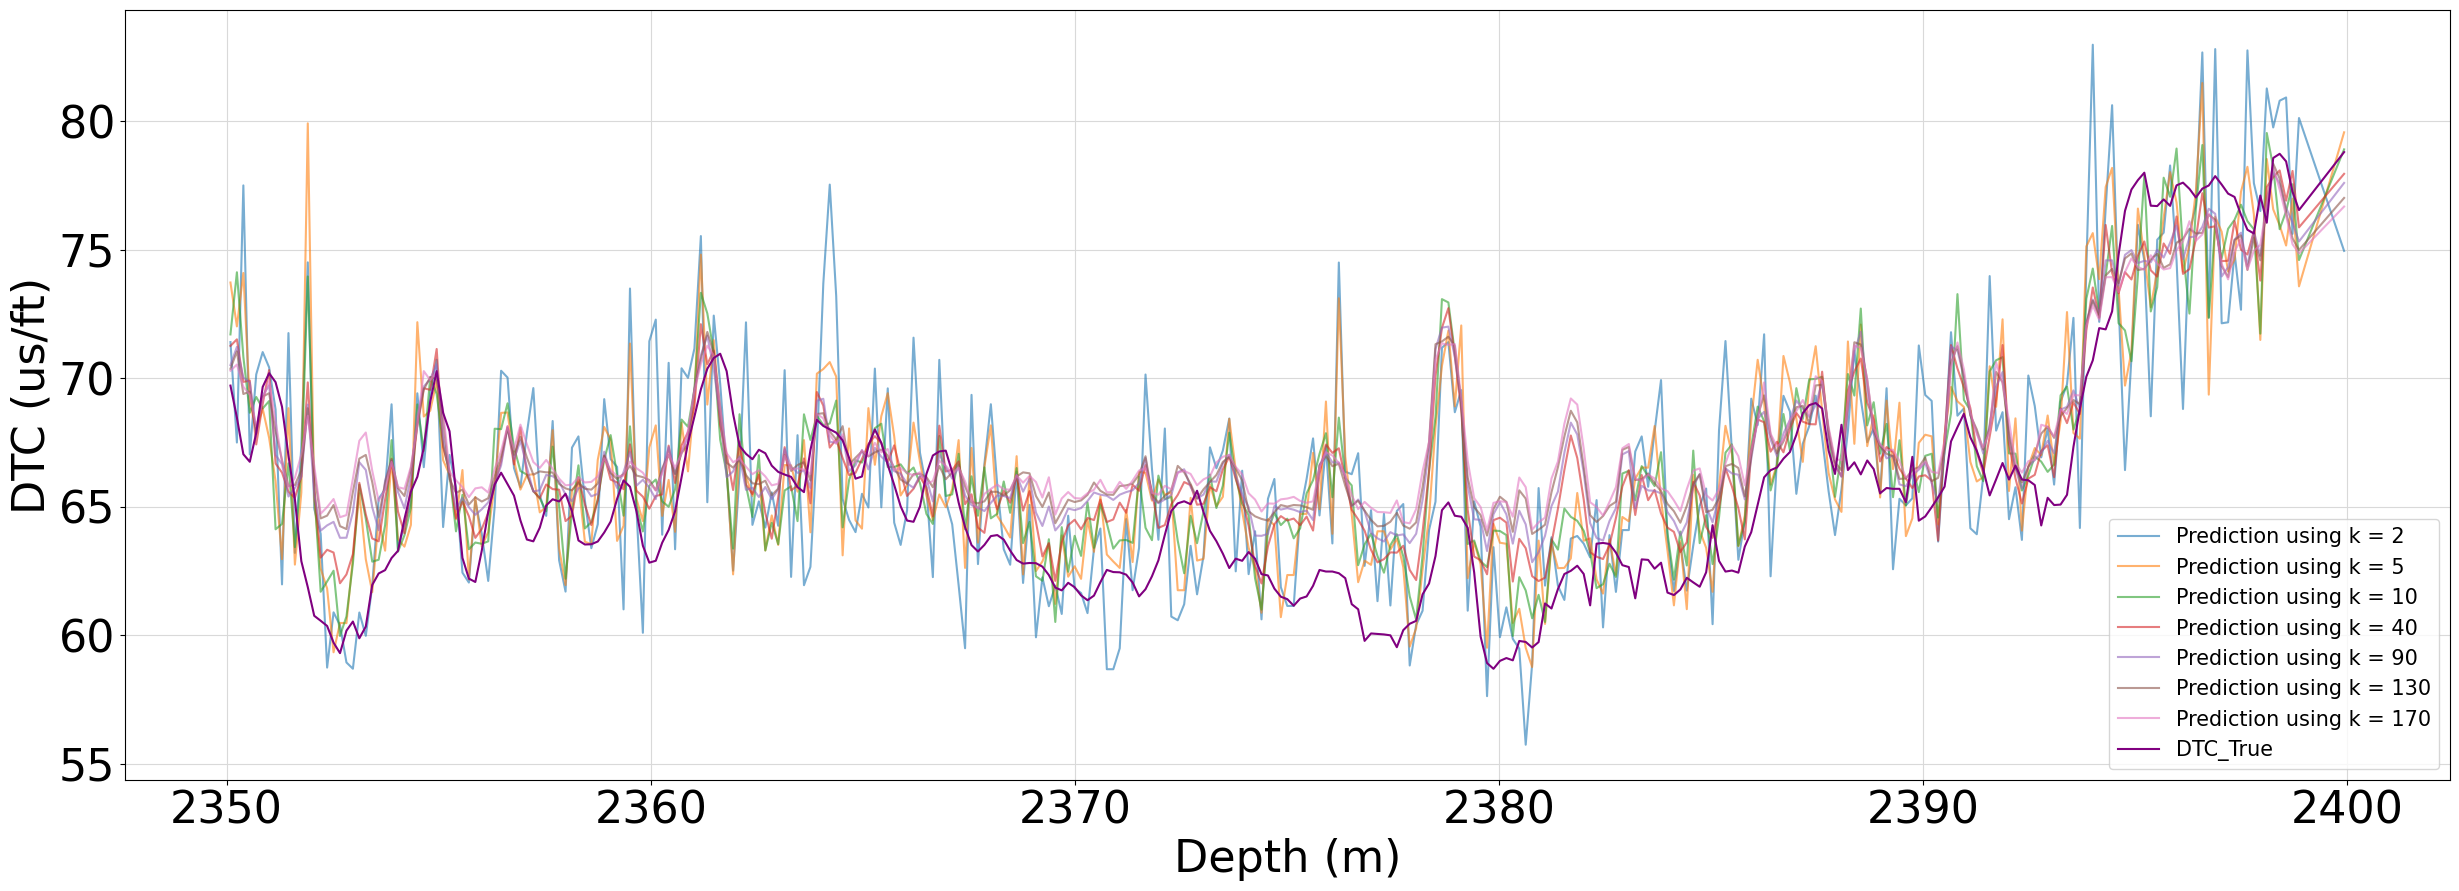

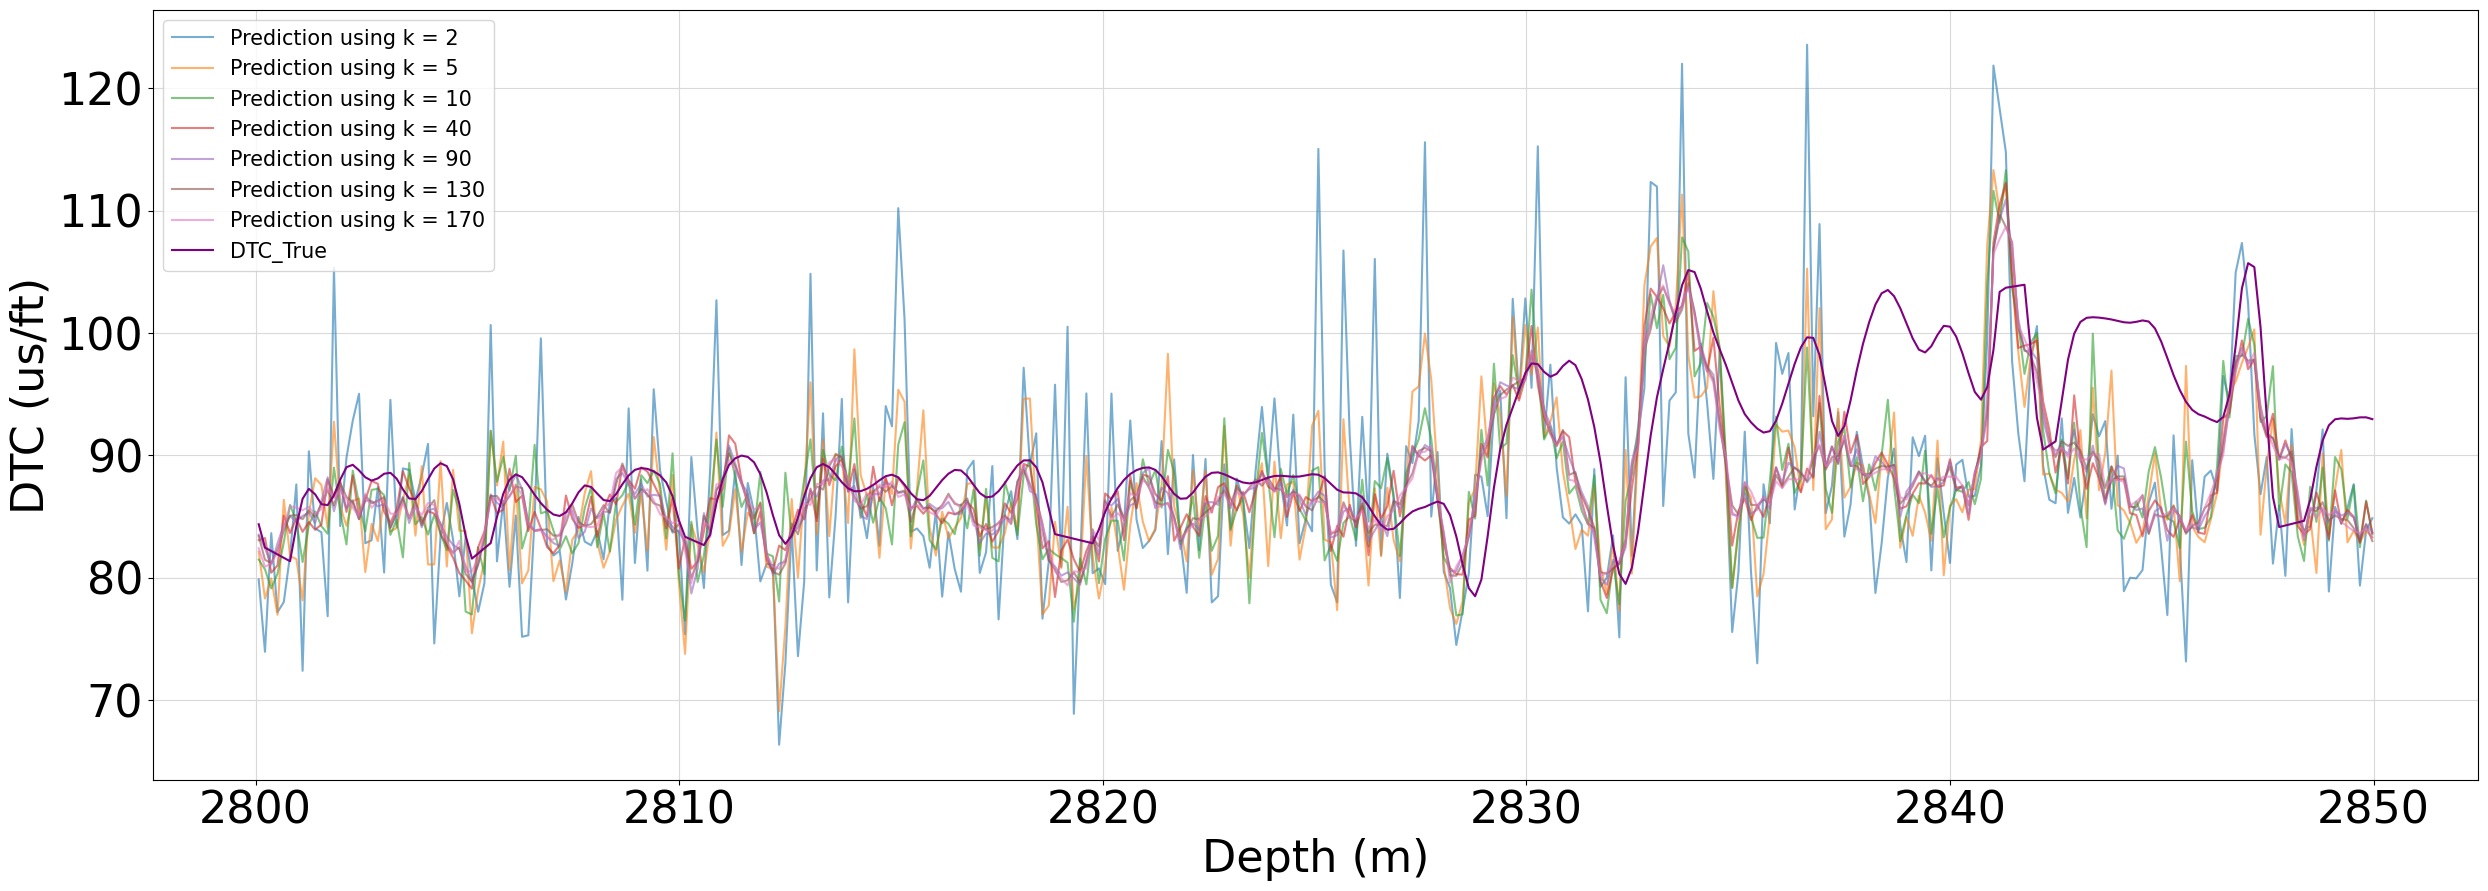

In [33]:
import gc #prevent memory loss

# RHOB Mulitple Cosine Sim Graph
RHOB_cs_df = df_feature_combine_dict['df_RHOB'][df_feature_combine_dict['df_RHOB'].filter(like='RHOB_').columns.tolist()]
RHOB_cs_df['WELL'] = df_original_test['WELL']
RHOB_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
RHOB_cs_df['RHOB'] = df_original_test['RHOB']
RHOB_cs_df = RHOB_cs_df.loc[index_feature['index_RHOB']]

index = 1
for well in RHOB_cs_df.WELL.unique():
    RHOB_cs_df_single_well = RHOB_cs_df[RHOB_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in RHOB_cs_df_single_well.columns:
        if col in RHOB_cs_df_single_well.filter(like='RHOB_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(RHOB_cs_df_single_well['DEPTH_TVD'], RHOB_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.5)
        elif col in ['RHOB']:
            plt.plot(RHOB_cs_df_single_well['DEPTH_TVD'], RHOB_cs_df_single_well[col], label='RHOB_True', color='r')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('RHOB (g/cc)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1


# NPHI Mulitple Cosine Sim Graph
NPHI_cs_df = df_feature_combine_dict['df_NPHI'][df_feature_combine_dict['df_NPHI'].filter(like='NPHI_').columns.tolist()]
NPHI_cs_df['WELL'] = df_original_test['WELL']
NPHI_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
NPHI_cs_df['NPHI'] = df_original_test['NPHI']
NPHI_cs_df = NPHI_cs_df.loc[index_feature['index_NPHI']]
index = 1
for well in NPHI_cs_df.WELL.unique():
    NPHI_cs_df_single_well = NPHI_cs_df[NPHI_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in NPHI_cs_df_single_well.columns:
        if col in NPHI_cs_df_single_well.filter(like='NPHI_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(NPHI_cs_df_single_well['DEPTH_TVD'], NPHI_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.5)
        elif col in ['NPHI']:
            plt.plot(NPHI_cs_df_single_well['DEPTH_TVD'], NPHI_cs_df_single_well[col], label='NPHI_True', color='blue')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('NPHI (v/v)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1

    
# DTC Mulitple Cosine Sim Graph
DTC_cs_df = df_feature_combine_dict['df_DTC'][df_feature_combine_dict['df_DTC'].filter(like='DTC_').columns.tolist()]
DTC_cs_df['WELL'] = df_original_test['WELL']
DTC_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
DTC_cs_df['DTC'] = df_original_test['DTC']
DTC_cs_df = DTC_cs_df.loc[index_feature['index_DTC']]
index = 1
for well in DTC_cs_df.WELL.unique():
    DTC_cs_df_single_well = DTC_cs_df[DTC_cs_df['WELL'] == well]
    plt.figure(figsize=(30, 10))
    for col in DTC_cs_df_single_well.columns:
        if col in DTC_cs_df_single_well.filter(like='DTC_').columns.tolist():
            s = ''.join(filter(str.isdigit, col))
            plt.plot(DTC_cs_df_single_well['DEPTH_TVD'], DTC_cs_df_single_well[col], label='Prediction using k = %s'%(int(s)), alpha=0.6)
        elif col in ['DTC']:
            plt.plot(DTC_cs_df_single_well['DEPTH_TVD'], DTC_cs_df_single_well[col], label='DTC_True', color='purple')

    plt.xticks(fontsize=32)
    plt.yticks(fontsize=32)
    plt.xlabel('Depth (m)', fontsize=32)
    plt.ylabel('DTC (us/ft)', fontsize=32)
    plt.grid(axis='x', color='0.85')
    plt.grid(axis='y', color='0.85')
    plt.legend(fontsize=15)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()
    index += 1

# RMSE Visualization

Run previous cells to active the following code

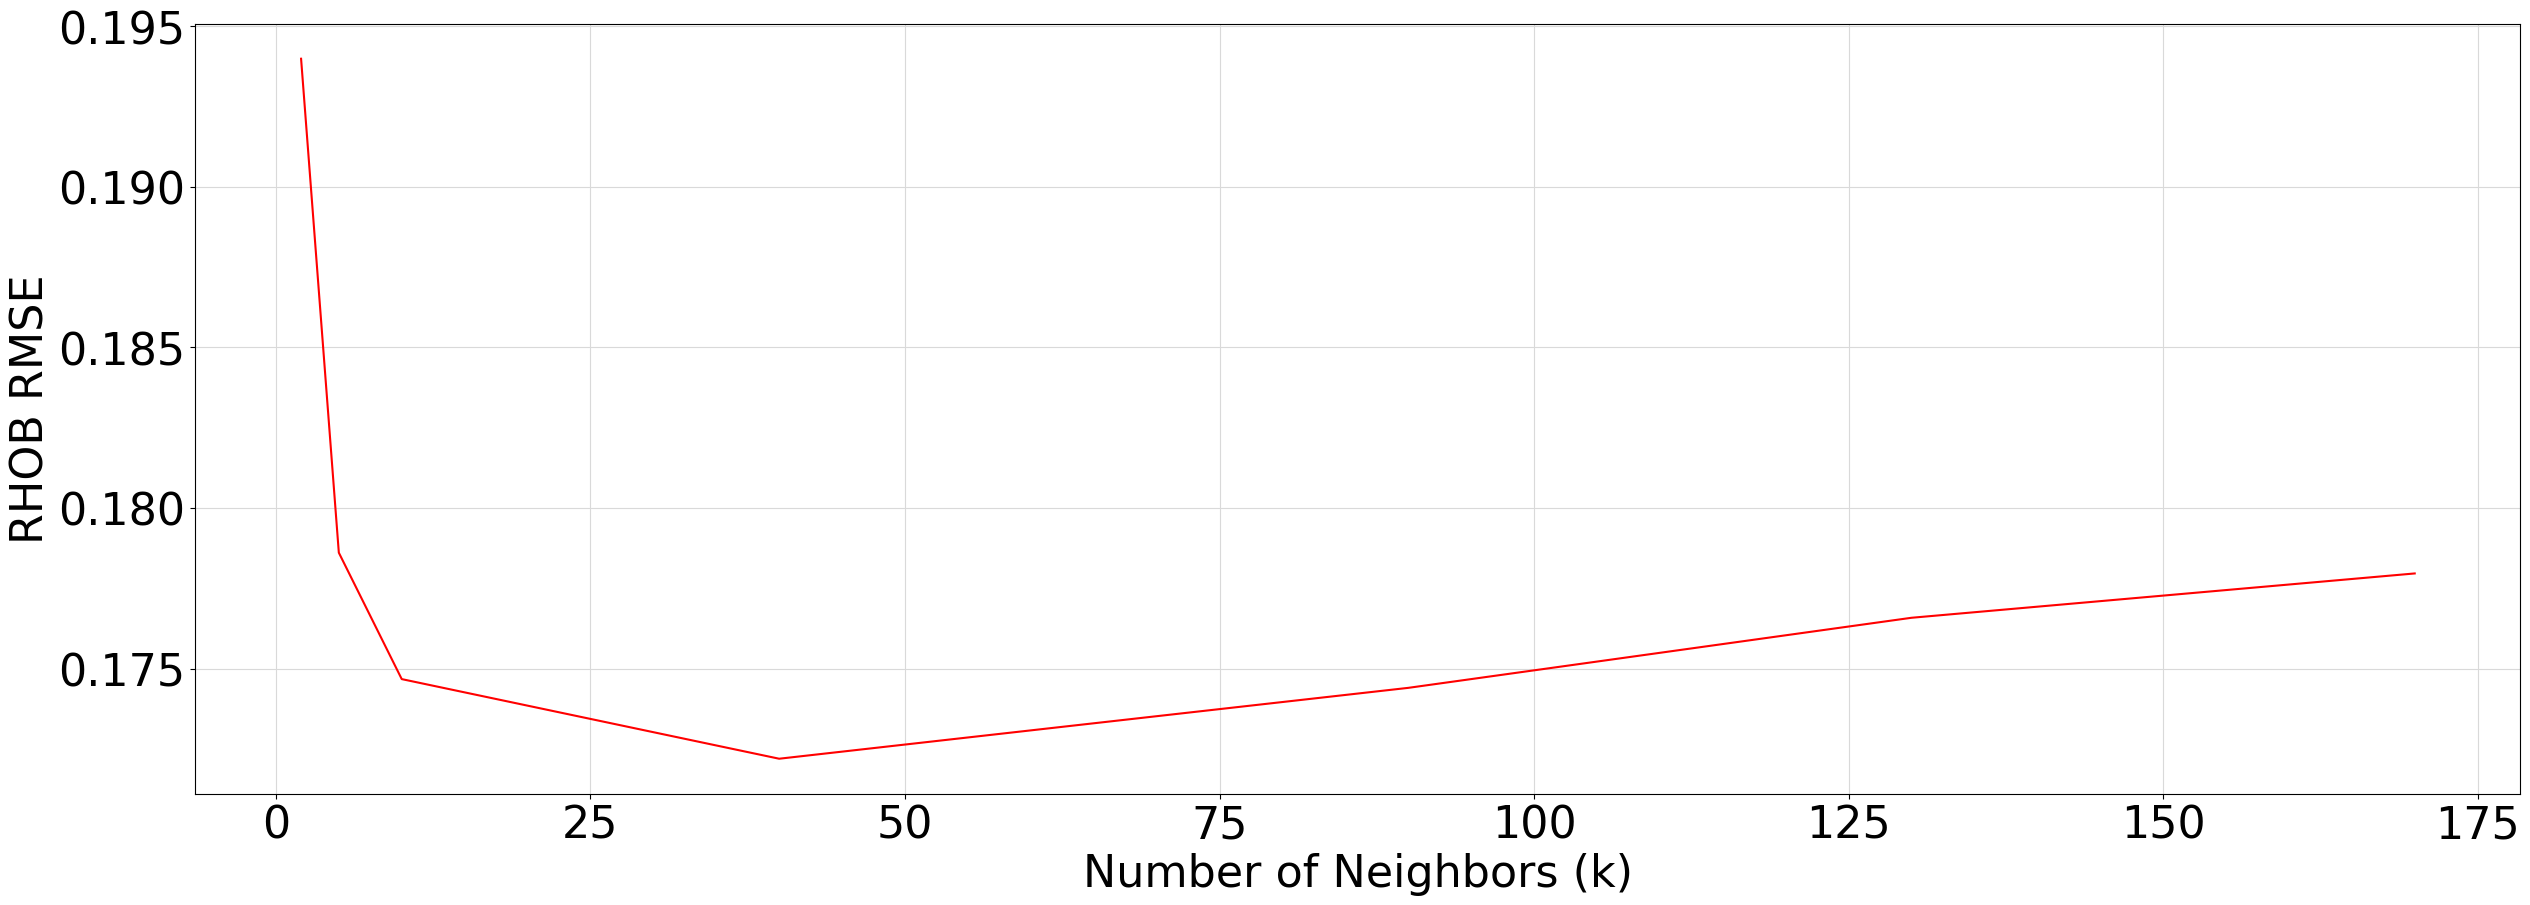

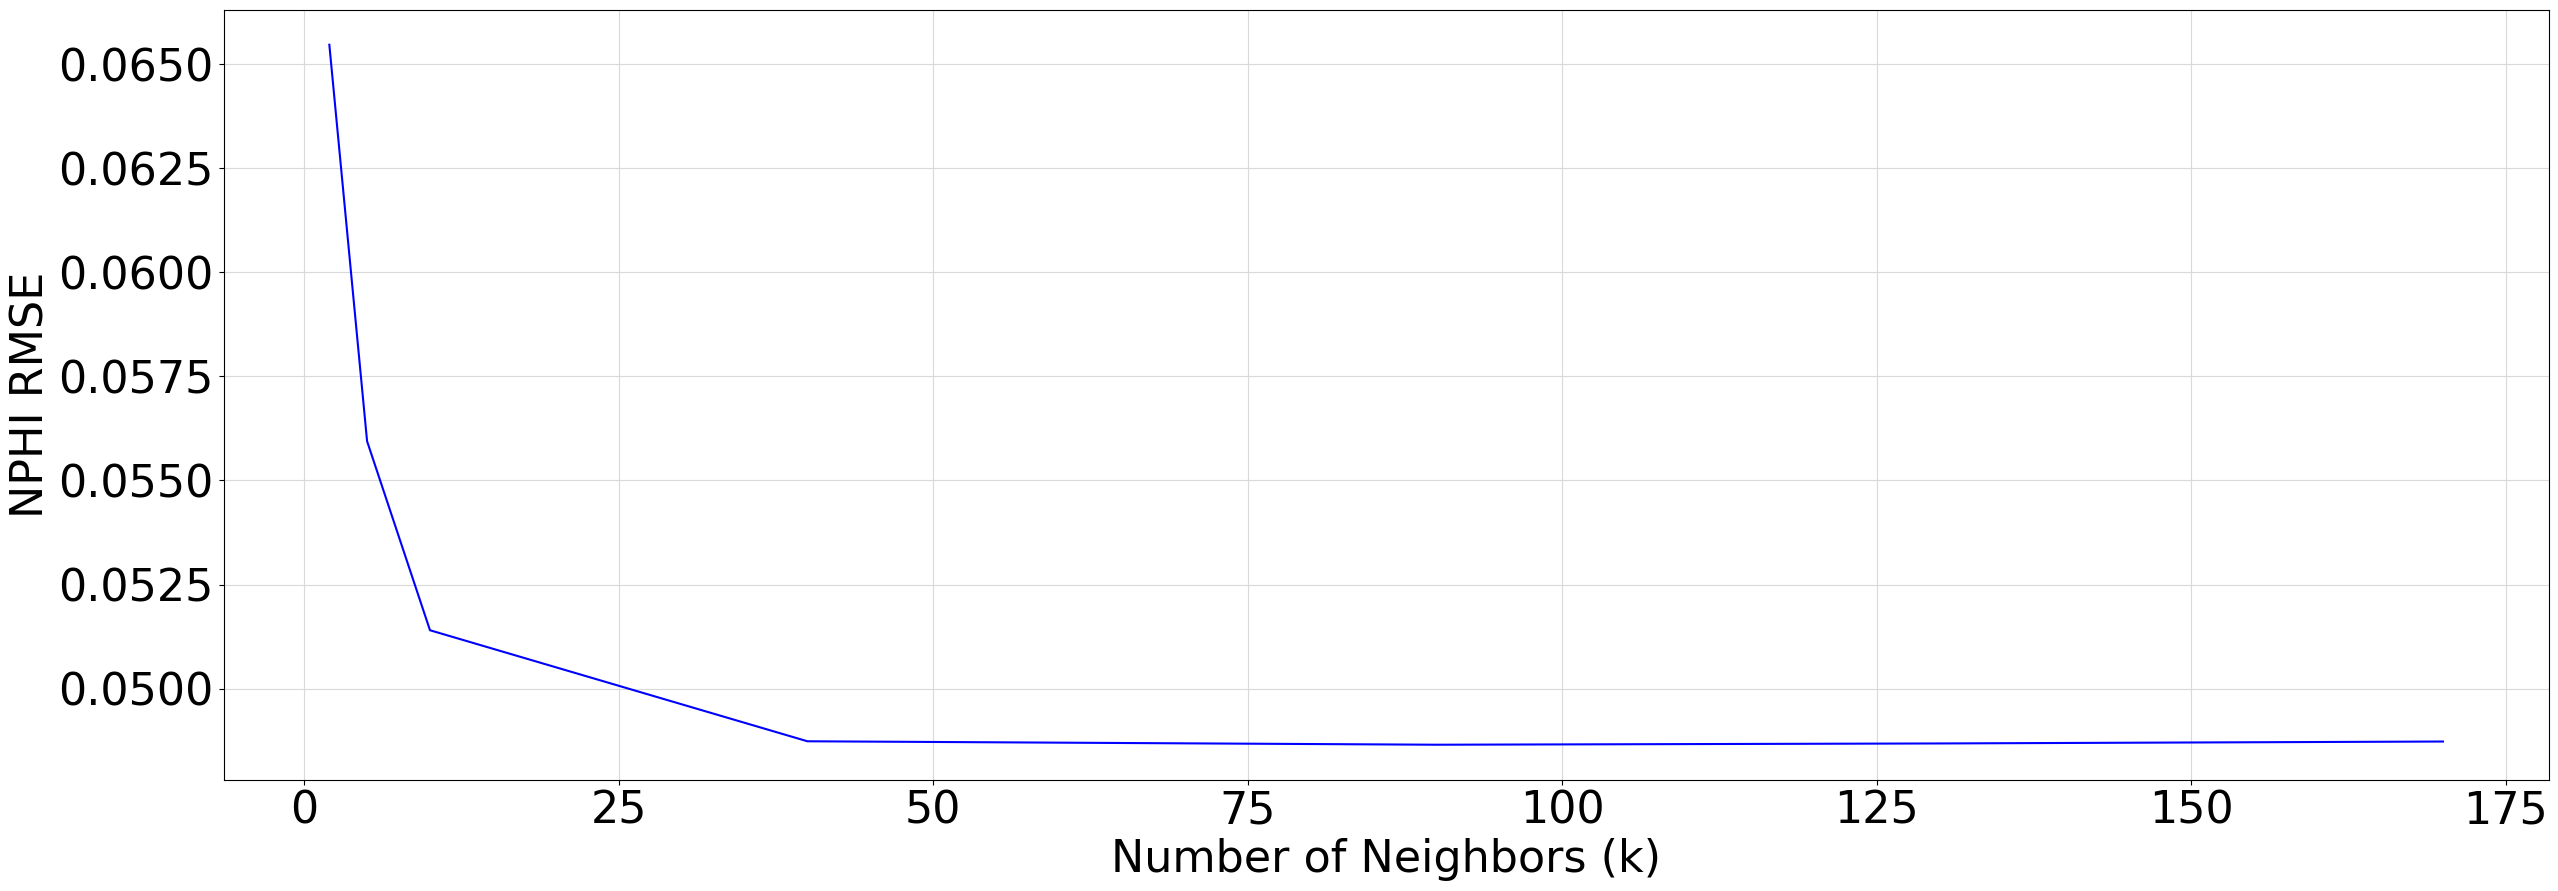

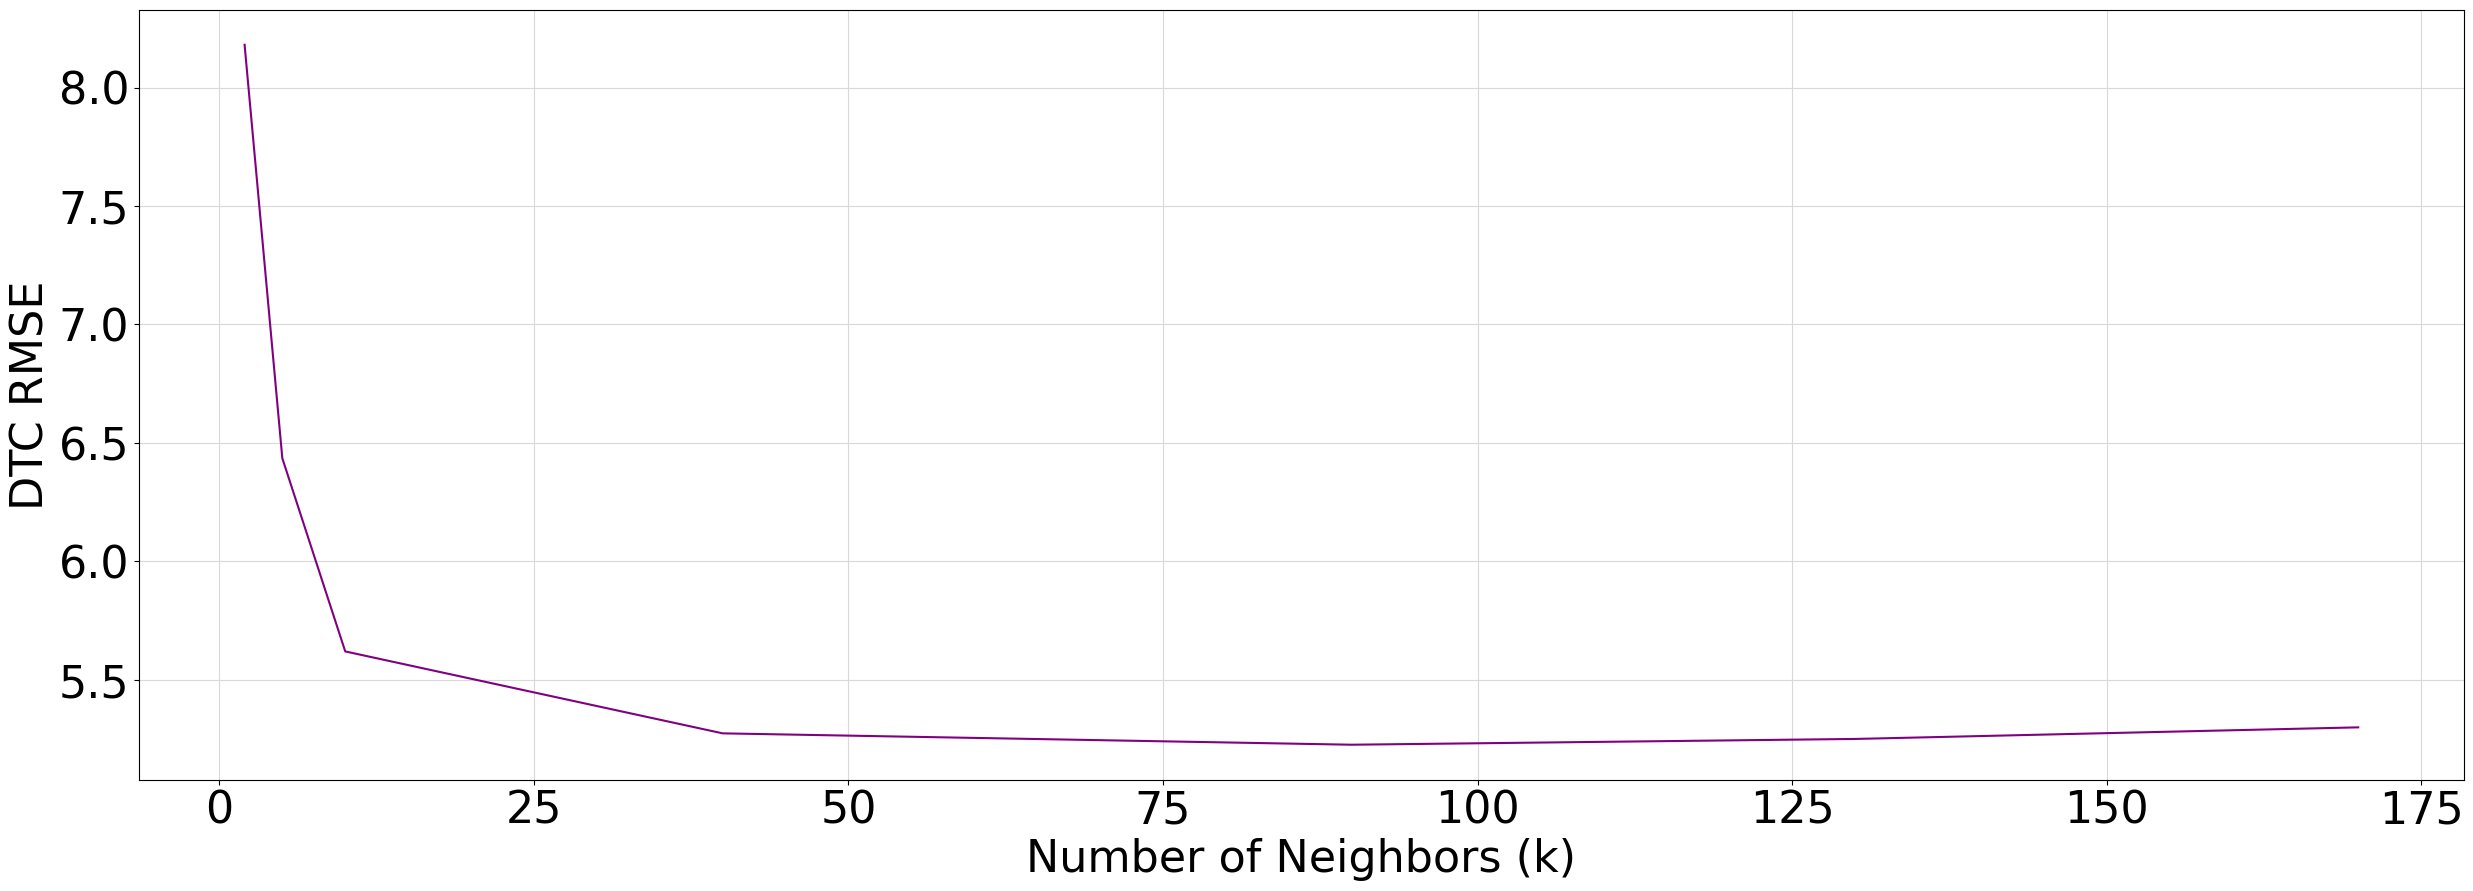

3330

In [34]:
from sklearn.metrics import mean_squared_error
import gc #prevent memory loss

# RHOB Mulitple Cosine Sim Graph
RHOB_cs_df = df_feature_combine_dict['df_RHOB'][df_feature_combine_dict['df_RHOB'].filter(like='RHOB_').columns.tolist()]
RHOB_cs_df['WELL'] = df_original_test['WELL']
RHOB_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
RHOB_cs_df['RHOB'] = df_original_test['RHOB']
RHOB_cs_df = RHOB_cs_df.loc[index_feature['index_RHOB']]

rmse_list = []
for col in RHOB_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'RHOB']:
        rmse = mean_squared_error(RHOB_cs_df['RHOB'].values, RHOB_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

plt.figure(figsize=(30, 10))
plt.plot(NN_list, rmse_list, color='r')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('RHOB RMSE', fontsize=32)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()


# NPHI Mulitple Cosine Sim Graph
NPHI_cs_df = df_feature_combine_dict['df_NPHI'][df_feature_combine_dict['df_NPHI'].filter(like='NPHI_').columns.tolist()]
NPHI_cs_df['WELL'] = df_original_test['WELL']
NPHI_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
NPHI_cs_df['NPHI'] = df_original_test['NPHI']
NPHI_cs_df = NPHI_cs_df.loc[index_feature['index_NPHI']]

rmse_list = []
for col in NPHI_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'NPHI']:
        rmse = mean_squared_error(NPHI_cs_df['NPHI'].values, NPHI_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

plt.figure(figsize=(30, 10))
plt.plot(NN_list, rmse_list, color='blue')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('NPHI RMSE', fontsize=32)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()


# DTC Mulitple Cosine Sim Graph
DTC_cs_df = df_feature_combine_dict['df_DTC'][df_feature_combine_dict['df_DTC'].filter(like='DTC_').columns.tolist()]
DTC_cs_df['WELL'] = df_original_test['WELL']
DTC_cs_df['DEPTH_TVD'] = df_original_test['DEPTH_TVD']
DTC_cs_df['DTC'] = df_original_test['DTC']
DTC_cs_df = DTC_cs_df.loc[index_feature['index_DTC']]

rmse_list = []
for col in DTC_cs_df.columns:
    if col not in ['WELL', 'DEPTH_TVD', 'DTC']:
        rmse = mean_squared_error(DTC_cs_df['DTC'].values, DTC_cs_df[col].values, squared = False)
        rmse_list.append(rmse)

plt.figure(figsize=(30, 10))
plt.plot(NN_list, rmse_list, color='purple')
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlabel('Number of Neighbors (k)', fontsize=32)
plt.ylabel('DTC RMSE', fontsize=32)
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.show()
plt.clf()
plt.close('all')
gc.collect()

# PCA Visualization

Import files "df_labeled_with_features_original.csv" created from "Imputation_WellLog_CF.ipynb" to continue.

In [35]:
# Import File and make necessary adjustments
df_labeled_with_features_original = pd.read_csv('df_labeled_with_features_original.csv') # Change file address if necessary

# Drop missing values
df_labeled_with_features_original = df_labeled_with_features_original.replace(-9999, np.nan)
df_labeled_with_features_drop = df_labeled_with_features_original.dropna()

In [36]:
df_labeled_with_features_drop

Unnamed: 0     WELL    DEPTH_TVD         GR      RHOB      NPHI  \
4238           4238  15/9-13  1113.655396  55.892757  1.774626  0.765867   
4239           4239  15/9-13  1113.807373  60.929138  1.800986  0.800262   
4240           4240  15/9-13  1113.959473  62.117264  1.817696  0.765957   
4241           4241  15/9-13  1114.111450  61.010860  1.829333  0.702521   
4242           4242  15/9-13  1114.263428  58.501236  1.813854  0.639708   
...             ...      ...          ...        ...       ...       ...   
1292781     1292884   35/9-7  2940.566406  73.434174  2.364000  0.162661   
1292782     1292885   35/9-7  2940.717773  73.363243  2.363551  0.162905   
1292783     1292886   35/9-7  2940.869385  70.562103  2.363479  0.162685   
1292784     1292887   35/9-7  2941.020752  67.006660  2.364090  0.160029   
1292785     1292888   35/9-7  2941.172363  67.702087  2.365784  0.156916   

                DTC Lithology_Type  FORCE_2020_LITHOFACIES_LITHOLOGY  
4238     147.837677      Sandstone                                 0  
4239     142.382431          Shale                                 2  
4240     138.258331          Shale                                 2  
4241     139.198914          Shale                                 2  
4242     144.290085          Shale                                 2  
...             ...            ...                               ...  
1292781   77.891953      Sandstone                                 0  
1292782   76.698967      Sandstone                                 0  
1292783   75.748085      Sandstone                                 0  
1292784   76.182335      Sandstone                                 0  
1292785   77.031029      Sandstone                                 0  

[813701 rows x 9 columns]

In [37]:
# Import scaler for PCA
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

from sklearn.decomposition import PCA

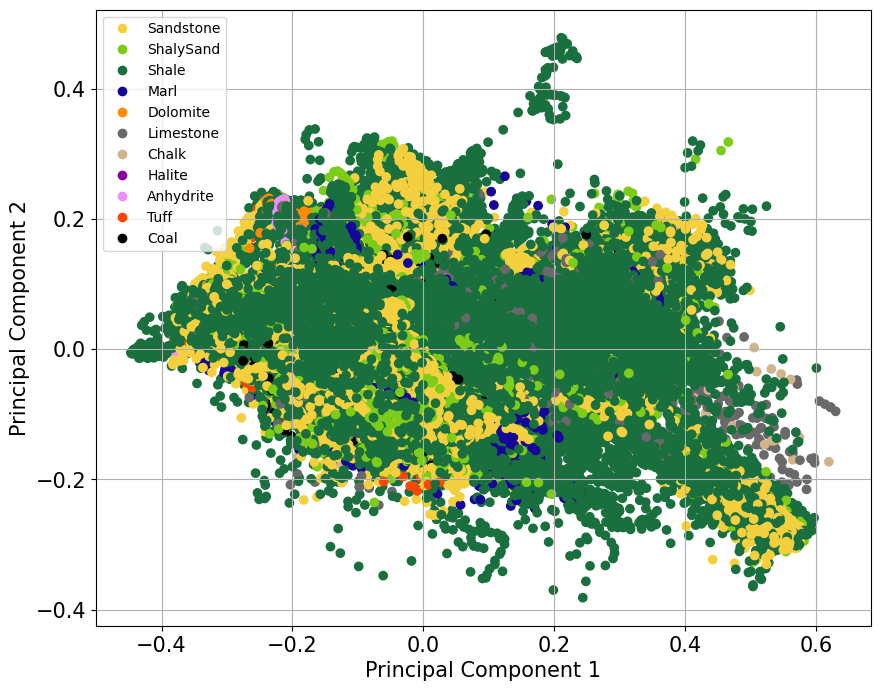

4109

In [38]:
import gc #prevent memory loss

## Color Code For Each Lithology
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

facies_color_map = { 'Sandstone': '#F4D03F',
                      'Shale Sandy': '#7ccc19',
                      'Shale': '#196F3D',
                      'Marl': '#160599',
                      'Dolomite': '#FF8C00',
                      'Limestone': '#696969',
                      'Chalk': '#D2B48C',
                      'Halite': '#87039e',
                      'Anhydrite': '#ec90fc',
                      'Tuff': '#FF4500',
                      'Coal': '#000000'
                      }


# get a list of the color codes.
facies_colors_total = [facies_color_map[mykey] for mykey in facies_color_map.keys()]
cmap_facies_total = colors.ListedColormap(facies_colors_total[0:len(facies_colors_total)], 'indexed')


# PCA 
mm_scaler = MinMaxScaler()

train_scaled_features = mm_scaler.fit_transform(df_labeled_with_features_drop[['GR', 'RHOB', 'NPHI', 'DTC']])
pca = PCA(n_components=2)
pcs = pca.fit_transform(train_scaled_features)

components_df = pd.DataFrame(pcs, columns = ['PC1', 'PC2'])
pca_df = pd.concat([components_df, df_labeled_with_features_drop['FORCE_2020_LITHOFACIES_LITHOLOGY']], axis=1)


fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)


ss = ax.scatter(x = pca_df['PC1'].tolist(), y = pca_df['PC2'].tolist(), c=pca_df['FORCE_2020_LITHOFACIES_LITHOLOGY'].tolist(), cmap = cmap_facies_total)
plt.legend(handles=ss.legend_elements()[0], labels=df_labeled_with_features_drop.sort_values(by=['FORCE_2020_LITHOFACIES_LITHOLOGY']).Lithology_Type.unique().tolist())
ax.grid()
plt.show()
plt.clf()
plt.close('all')
gc.collect()